# App Rating Prediction

### 1.Load the data file using pandas.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
mydata=pd.read_csv('googleplaystore.csv')

In [4]:
mydata.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,hoi,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 2. Check for null values in the data. Get the number of null values for each column.

In [3]:
null=mydata.isnull().sum()
null

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 3.Drop records with nulls in any of the columns. 

In [4]:
mydata=mydata.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'],axis=0)

In [6]:
mydata.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [7]:
mydata.Rating=mydata.Rating.fillna(mydata.Rating.mean(), axis=0) #as the records were huge so i replaced the Nas with the mean value

In [8]:
mydata.loc[mydata.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [9]:
mydata.Rating.isnull().any()

False

### 4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

###### A)Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [10]:
mydata.Size.head(10)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object

In [200]:
mydata.Size.tail(10)

10831     9800
10832      582
10833      619
10834     2600
10835     9600
10836    53000
10837     3600
10838     9500
10839        0
10840    19000
Name: Size, dtype: object

In [156]:
# # mydata.Size=mydata.Size.str.replace('M','')
# # mydata.Size=mydata.Size.str.replace('k','')
# # mydata.Size=mydata.Size.str.replace('Varies with device','0')
# # mydata.Size=mydata.Size.str.replace('1000+','') #checked that it has a value 1,000+
# # mydata.Size=mydata.Size.str.replace(',','')
# mydata.Size

In [157]:
# mydata.Size= mydata.Size.astype('float')

In [11]:
def scale_size(size):
    if 'M' in size:
        size=size[:-1]
        size=float(size)*1000
        return(size)
    elif 'k'in size:
        size=size[:-1]
        return(size)
    else:
        return 0
    

mydata.Size=mydata.Size.map(scale_size)

        

In [12]:
mydata.Size=mydata.Size.astype(float)

In [13]:
mydata.Size.head(6)

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
5     5600.0
Name: Size, dtype: float64

In [14]:
mydata.Size=mydata.Size.replace(',','')

In [15]:
mydata.Size=mydata.Size.astype(int)

##### B)Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [16]:
mydata.Reviews.dtype

dtype('O')

In [17]:
mydata.Reviews.head(10)

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object

In [18]:
mydata.loc[mydata.Reviews=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
mydata.Reviews=mydata.Reviews.astype(int)

##### C)Installs field is currently stored as string and has values like 1,000,000+. 

In [20]:
mydata.Installs=mydata.Installs.str.replace('+','')
mydata.Installs=mydata.Installs.str.replace(',','')

In [21]:
mydata.Installs=mydata.Installs.astype(int)

In [22]:
mydata.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10829, dtype: int32

#####  D)Removing dollar sign from price

In [23]:
mydata.Price.head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [24]:
str(mydata.Price).isnumeric()

False

In [25]:
mydata.Price=mydata.Price.str.replace('$','')
mydata.Price=mydata.Price.str.replace('Everyone','0')

In [26]:
mydata.Price=mydata.Price.astype(float)

In [27]:
mydata.Price.mean()

1.0280912364945871

In [28]:
mydata.Price=mydata.Price.astype(int)

### Sanity checks

##### Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range

In [29]:
mydata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [30]:
mydata.Rating.unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 4.        ,
       4.19183761, 4.8       , 4.9       , 3.6       , 3.7       ,
       3.2       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [37]:
mydata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [38]:
mydata.Rating.isnull().any()

False

In [31]:
mydata.Rating=round(mydata.Rating.astype(float),1)

#####  Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [32]:
subset=mydata.loc[(mydata.Reviews>mydata.Installs)].index
subset


Int64Index([2454, 4550, 4663, 5812, 5917, 6508, 6700, 7402, 8591, 9096, 10697], dtype='int64')

In [34]:
mydata=mydata.drop(index=subset)


In [35]:
# mydata[(mydata.Reviews > mydata.Installs)==True]
# for checking if any reviews columns which are greater than installs
(mydata.Reviews > mydata.Installs).any()

False

In [36]:
mydata.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10818, dtype: int32

In [37]:
mydata.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10818, dtype: int32

In [38]:
(mydata.Reviews > mydata.Installs).any()

False

##### For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [39]:
mydata.Type.value_counts()

Free    10027
Paid      791
Name: Type, dtype: int64

In [41]:
subset_type= mydata.loc[(mydata.Type=='Free') & (mydata.Price>0)].index
subset

Int64Index([2454, 4550, 4663, 5812, 5917, 6508, 6700, 7402, 8591, 9096, 10697], dtype='int64')

In [131]:
mydata.to_csv('C:/Users/lenovo/Desktop/Simpilearn/PYTHON/Nimisha Pandey/datas/new_gpay.csv')

In [45]:
mydata.Type=mydata.drop(index=subset_type, axis=0)

In [46]:
mydata.Type

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                                      hoi
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: Type, Length: 10818, dtype: object

### 6. Performing univariate analysis: 

##### Boxplot for Price

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
mydata.Price

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10818, dtype: int32

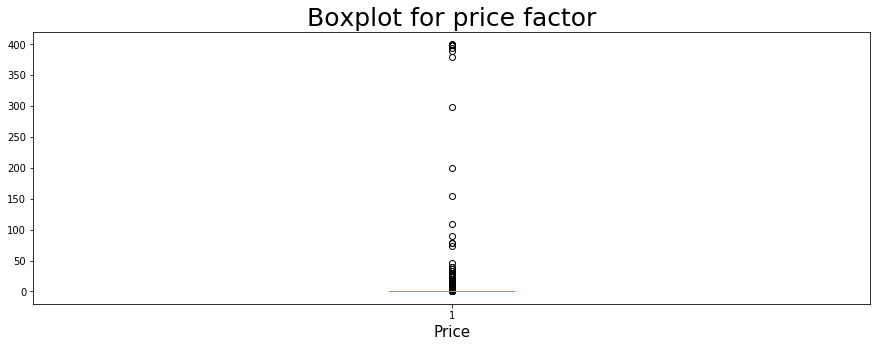

In [49]:
plt.figure(figsize=(15,5))
plt.boxplot(mydata.Price, vert=True)

plt.xlabel('Price', size=15)
plt.title('Boxplot for price factor', size=25)
plt.show()

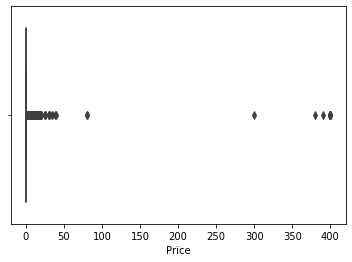

In [55]:
sns.boxplot(mydata.Price, data=mydata)

##### Boxplot for Reviews

In [50]:
mydata.Reviews.mean()

445052.89388056943

In [51]:
mydata.Reviews.head(10)

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: int32

In [52]:
mydata.Reviews=mydata.Reviews.astype(int)

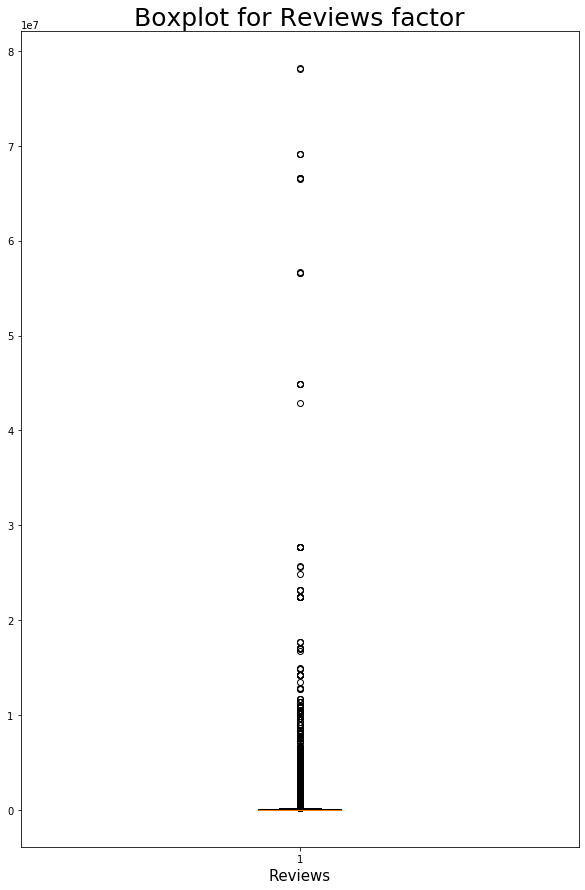

In [53]:
plt.figure(figsize=(10,15))
plt.boxplot(mydata.Reviews)
plt.xlabel('Reviews', size=15)
plt.title('Boxplot for Reviews factor', size=25)
plt.show()

Are there any apps with very high number of reviews? Do the values seem right?


###### Are there any apps with very high number of reviews? Do the values seem right?

##### Histogram for Rating

Text(0.5, 1.0, 'Histogram for Ratings factor')

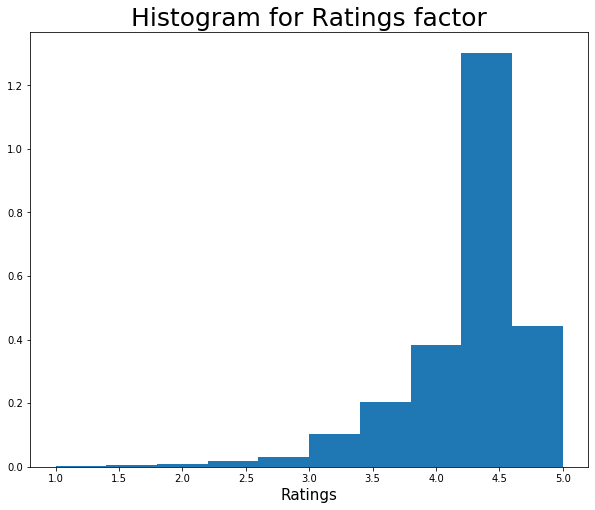

In [54]:
plt.figure(figsize=(10,8))
plt.hist(mydata.Rating, bins=10, density= True)
plt.xlabel('Ratings', size=15)
plt.title('Histogram for Ratings factor', size=25)

###### How are the ratings distributed? Is it more toward higher ratings?

#####  box plot for ratings

Text(0.5, 1.0, 'Boxplot for Ratings factor')

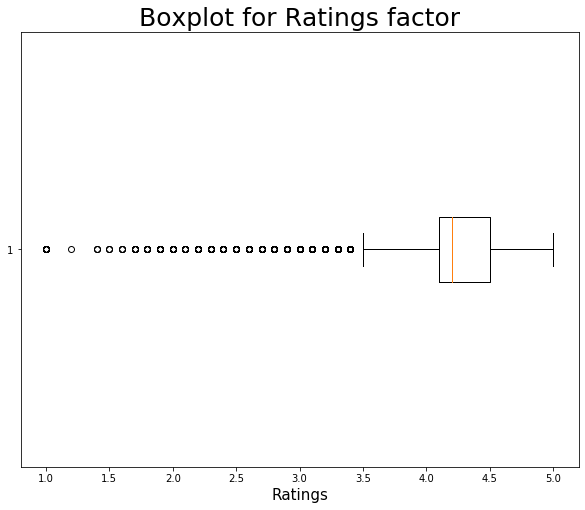

In [55]:
plt.figure(figsize=(10,8))
plt.boxplot(mydata.Rating, vert=False)
plt.xlabel('Ratings', size=15)
plt.title('Boxplot for Ratings factor', size=25)

#### Histogram for Size

Text(0.5, 1.0, 'Histogram for size factor')

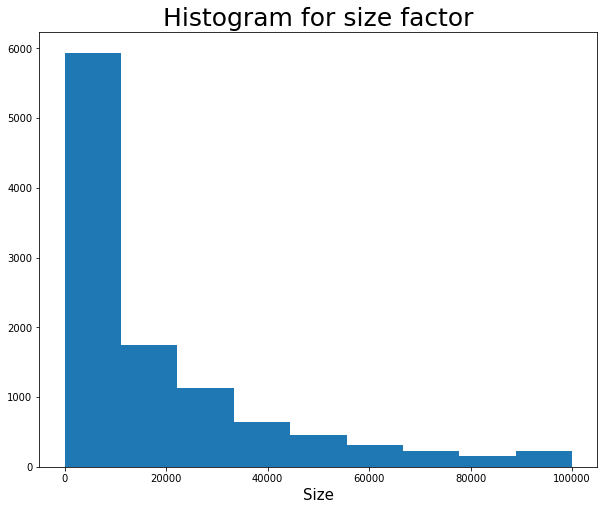

In [56]:
plt.figure(figsize=(10,8))
plt.hist(mydata.Size, bins=9)
plt.xlabel('Size', size=15)
plt.title('Histogram for size factor', size=25)

##### box plot for size

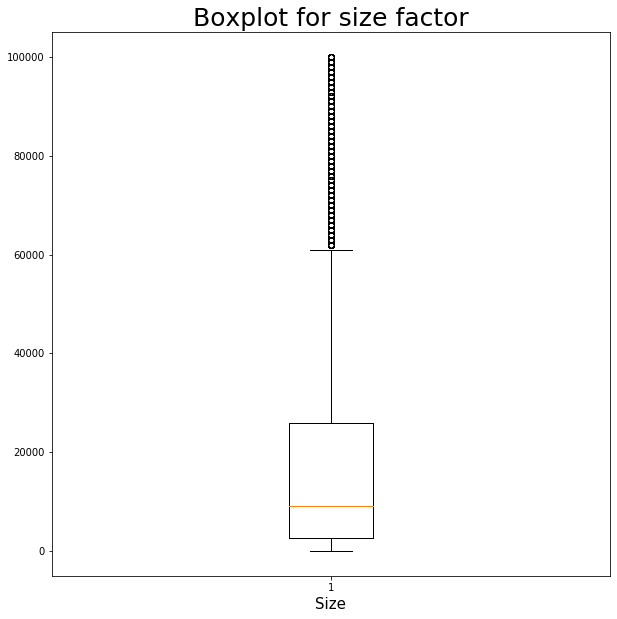

In [57]:
plt.figure(figsize=(10,10))
plt.boxplot(mydata.Size)
plt.xlabel('Size', size=15)
plt.title('Boxplot for size factor', size=25)
plt.show()

### Note down your observations for the plots made above. Which of these seem to have outliers?

### 7. Outlier treatment: 

#### Price: From the box plot, it seems like there are some apps with very high price. A price of 200dollars for an application on the Play Store is very high and suspicious!

In [58]:
mydata.Price.value_counts() # to check the frequency of customers who pays for more priced apps

0      10169
2        163
1        133
4         88
3         79
5         37
9         23
6         18
399       12
14        12
7          9
19         8
29         7
8          7
24         7
12         5
10         5
11         5
16         3
15         2
33         2
17         2
79         2
39         2
13         2
25         1
89         1
200        1
400        1
389        1
18         1
109        1
154        1
394        1
46         1
299        1
379        1
30         1
28         1
37         1
74         1
Name: Price, dtype: int64

In [59]:
price_outlier=mydata.Price

In [60]:
price_outlier=mydata.Price.drop(mydata.Price[(mydata.Price>105)].index, axis=0)

In [61]:
price_outlier.value_counts()

0     10169
2       163
1       133
4        88
3        79
5        37
9        23
6        18
14       12
7         9
19        8
8         7
24        7
29        7
10        5
11        5
12        5
16        3
39        2
13        2
33        2
17        2
15        2
79        2
74        1
18        1
28        1
89        1
25        1
37        1
30        1
46        1
Name: Price, dtype: int64

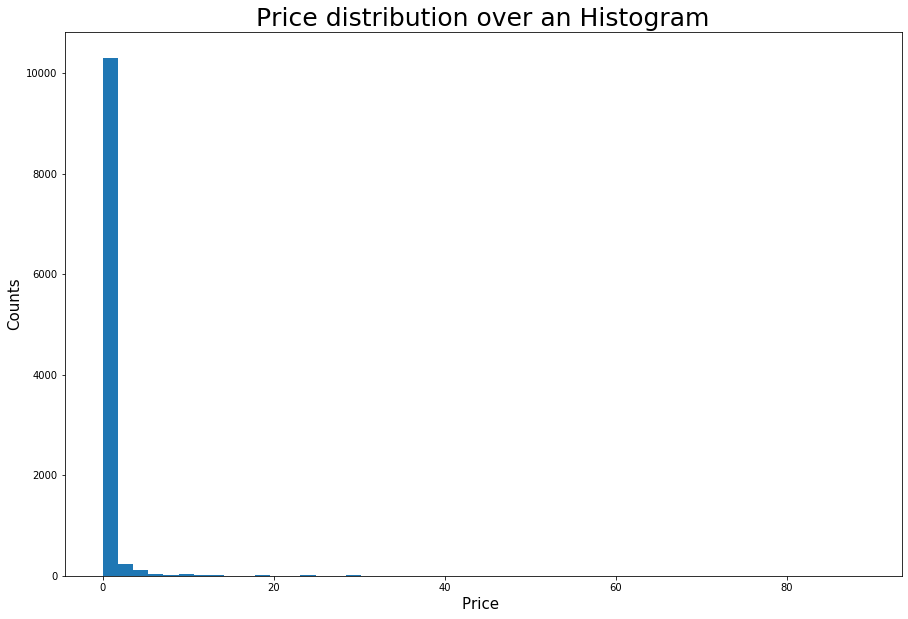

In [62]:
# we will check the price distribution via Histogram
plt.figure(figsize=(15,10))
plt.hist(price_outlier, bins=50)
plt.ylabel('Counts', size=15)
plt.xlabel('Price ', size=15)
plt.title('Price distribution over an Histogram', size=25)
plt.show()

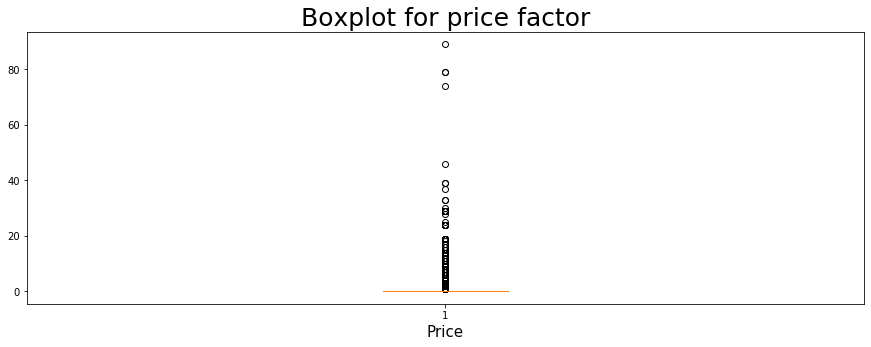

In [63]:
plt.figure(figsize=(15,5))
plt.boxplot(price_outlier, vert=True)

plt.xlabel('Price', size=15)
plt.title('Boxplot for price factor', size=25)
plt.show()

#### Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [64]:
reviews_outlier= mydata.Reviews

In [65]:
price_outlier=mydata.Price.drop(mydata.Price[(mydata.Price>105)].index, axis=0)

In [66]:
reviews_outlier=mydata.Reviews.drop(mydata.Reviews[(mydata.Reviews>2000000)].index, axis=0)

(array([9169.,  482.,  241.,  119.,  102.,   87.,   64.,   56.,   18.,
          27.]),
 array([      0. ,  198606.8,  397213.6,  595820.4,  794427.2,  993034. ,
        1191640.8, 1390247.6, 1588854.4, 1787461.2, 1986068. ]),
 <a list of 10 Patch objects>)

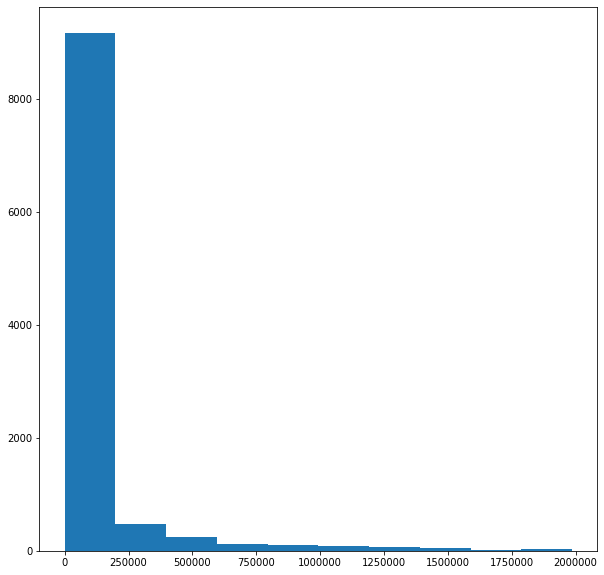

In [67]:
plt.figure(figsize=(10,10))
plt.hist(reviews_outlier, bins=10)

In [68]:
reviews_outlier[(reviews_outlier>2000000)].any()

False

#### Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

In [69]:
quantile=[.10, .25, .50, .70, .90, .95, .99]
for i in quantile:
    percentile=int(mydata.Installs.quantile(q=i))
    print('The quantile for',i,':',percentile)

The quantile for 0.1 : 100
The quantile for 0.25 : 5000
The quantile for 0.5 : 100000
The quantile for 0.7 : 1000000
The quantile for 0.9 : 10000000
The quantile for 0.95 : 50000000
The quantile for 0.99 : 500000000



#### 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

##### Make scatter plot/joinplot for Rating vs. Price

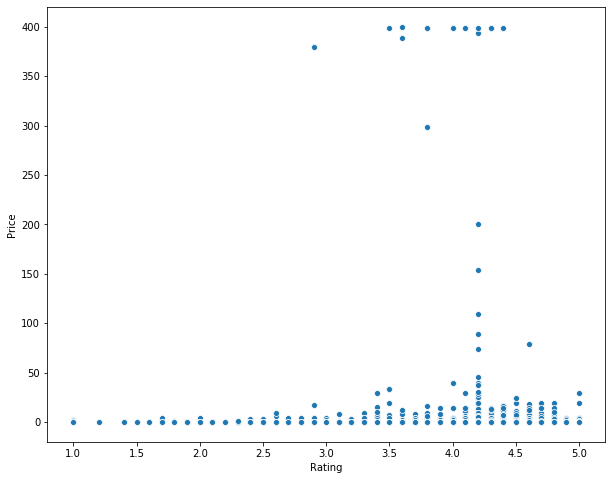

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=mydata.Rating, y=mydata.Price, data=mydata)

In [71]:
mydata.Price.corr(mydata.Rating)

-0.020710938244876423

###### What pattern do you observe? Does rating increase with price?

##### Make scatter plot/joinplot for Rating vs. Size

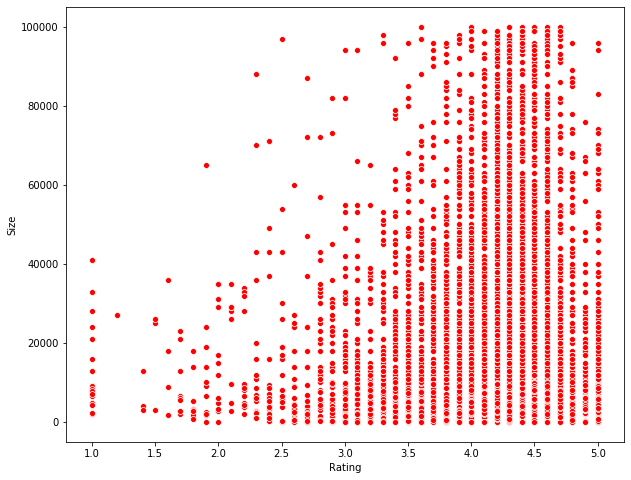

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=mydata.Rating, y='Size', data=mydata, color='red')

In [82]:
mydata.Size.corr(mydata.Rating)

0.04438264145169456

###### Are heavier apps rated better?

#### Make boxplot for Rating vs. Content Rating

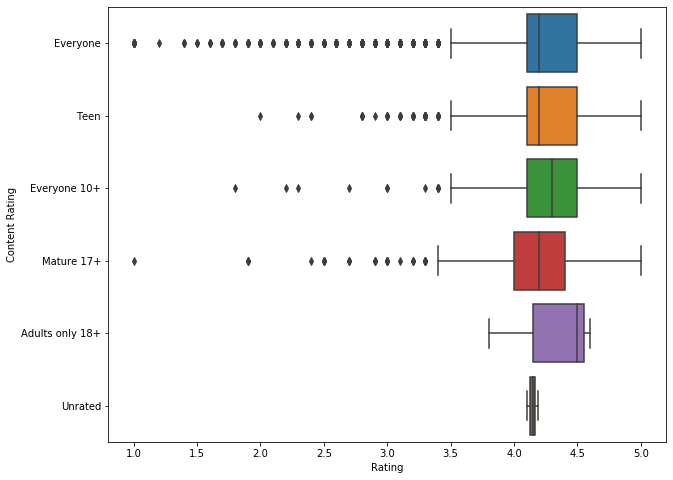

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Rating', y='Content Rating',data=mydata)

##### Is there any difference in the ratings? Are some types liked better?

#### Make boxplot for Ratings vs. Category

In [89]:
mydata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [253]:
app_category=mydata.Category.unique()
app_category

dictionary={}
for i in range(0,len(app_category)):
    dictionary[app_category[i]]=i
    
dictionary
# a=mydata.Category
# a
# a=a.map(dictionary)
# a.tail()


{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32}

In [254]:
mydata.Category=mydata.Category.map(dictionary)
mydata.Category

0         0
1         0
2         0
3         0
4         0
         ..
10836    18
10837    18
10838    19
10839     3
10840    16
Name: Category, Length: 10818, dtype: int64

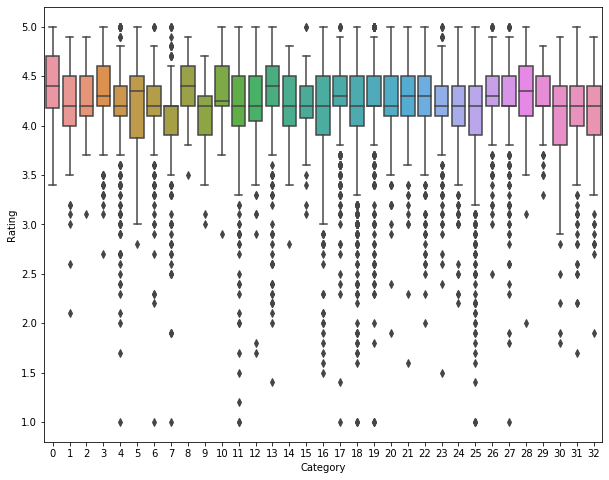

In [255]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Category', y='Rating', data=mydata)

##### Which genre has the best ratings?

In [256]:
# So, we saw in the above boxplot that the index 0 of genre has a better rating. to find the genre-
for i, j in dictionary.items():
    if j==0:
        print('The genre which has the best ratings:', i)


The genre which has the best ratings: 0


### 9.Data preprocessing

In [413]:
int1=pd.read_csv('googleplaystore.csv')
int1.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,hoi,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up


#### Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [414]:
int1.Installs.isnull().any()

False

In [415]:
int1.Installs=int1.Installs.str.replace('+','')
int1.Installs=int1.Installs.str.replace(',','')
int1.Installs
int1.Installs.dtype

dtype('O')

In [416]:
int1.Installs.astype(int)

ValueError: invalid literal for int() with base 10: 'Free'

In [417]:
free=int1.Installs.loc[int1.Installs=='Free'].index
free

Int64Index([10472], dtype='int64')

In [418]:
int1.Installs=int1.Installs.drop(index=free, axis=0)
int1.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [419]:
null=int1.Installs.isnull().any()
null
null=int1.loc[int1.Installs.isnull()].index
null
int1=int1.dropna(subset=['Installs'], axis=0)
int1.Installs.isnull().any()

False

In [420]:
int1.Installs=int1.Installs.astype(int)

In [421]:
log_installs=np.log(int1.Installs+1)
log_installs

0         9.210440
1        13.122365
2        15.424949
3        17.727534
4        11.512935
           ...    
10836     8.517393
10837     4.615121
10838     6.908755
10839     6.908755
10840    16.118096
Name: Installs, Length: 10840, dtype: float64

In [422]:
log_installs.describe()

count    10840.000000
mean        11.249204
std          4.526886
min          0.000000
25%          6.908755
50%         11.512935
75%         15.424949
max         20.723266
Name: Installs, dtype: float64

In [423]:
int1.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,hoi,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up


In [424]:
int1=int1.drop(columns=['App', 'Last Updated', 'Current Ver','Android Ver'], axis=1)
int1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education
10838,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference


In [425]:
int1.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [426]:
int1=int1.dropna(subset=['Type', 'Content Rating'], axis=0)
int1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education
10838,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference


In [427]:
mean_rating=int1.Rating.mean()
int1.Rating=int1.Rating.fillna(value=mean_rating)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [428]:
int1.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

#### DUMMY VARIABLE OPERATIONS 

###### CATEGORY VARIABLE

In [429]:
int1.head()
int1.Category

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10839, dtype: object

In [430]:
app_category=int1.Category.unique()
app_category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [431]:
app_category=int1.Category.unique()
app_category

dictionary={}
for i in range(0,len(app_category)):
    dictionary[app_category[i]]=i
    
dictionary


{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32}

In [432]:
int1.Category= int1.Category.map(dictionary)
int1.Category

0         0
1         0
2         0
3         0
4         0
         ..
10836    18
10837    18
10838    19
10839     3
10840    16
Name: Category, Length: 10839, dtype: int64

In [433]:
# for checking if the mappping is correct or not
for i,j in dictionary.items():
        if j ==1:
            print(i)

AUTO_AND_VEHICLES


##### GENRES

In [434]:
genres_value=int1.Genres.unique()
genres_value
gen_dictionary={}
for i in range(0,len(genres_value)):
    gen_dictionary[genres_value[i]]=i
gen_dictionary

{'Art & Design': 0,
 'Art & Design;Pretend Play': 1,
 'Art & Design;Creativity': 2,
 'Art & Design;Action & Adventure': 3,
 'Auto & Vehicles': 4,
 'Beauty': 5,
 'Books & Reference': 6,
 'Business': 7,
 'Comics': 8,
 'Comics;Creativity': 9,
 'Communication': 10,
 'Dating': 11,
 'Education;Education': 12,
 'Education': 13,
 'Education;Creativity': 14,
 'Education;Music & Video': 15,
 'Education;Action & Adventure': 16,
 'Education;Pretend Play': 17,
 'Education;Brain Games': 18,
 'Entertainment': 19,
 'Entertainment;Music & Video': 20,
 'Entertainment;Brain Games': 21,
 'Entertainment;Creativity': 22,
 'Events': 23,
 'Finance': 24,
 'Food & Drink': 25,
 'Health & Fitness': 26,
 'House & Home': 27,
 'Libraries & Demo': 28,
 'Lifestyle': 29,
 'Lifestyle;Pretend Play': 30,
 'Adventure;Action & Adventure': 31,
 'Arcade': 32,
 'Casual': 33,
 'Card': 34,
 'Casual;Pretend Play': 35,
 'Action': 36,
 'Strategy': 37,
 'Puzzle': 38,
 'Sports': 39,
 'Music': 40,
 'Word': 41,
 'Racing': 42,
 'Casual;

In [435]:
int1.Genres=int1.Genres.map(gen_dictionary)
int1.Genres

0         0
1         1
2         0
3         0
4         2
         ..
10836    13
10837    13
10838    85
10839     6
10840    29
Name: Genres, Length: 10839, dtype: int64

In [436]:
# for checking if the mappping is correct or not
for i,j in gen_dictionary.items():
        if j ==1:
            print(i)

Art & Design;Pretend Play


#### Content Rating

In [437]:
rating_value=int1['Content Rating'].unique()
rating_dictionary={}
for i in range(0, len(rating_value)):
    rating_dictionary[rating_value[i]]=i
rating_dictionary

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

In [438]:
a=int1['Content Rating']
a

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10839, dtype: object

In [439]:
a=a.map(rating_dictionary)

In [442]:
a

0        0
1        0
2        0
3        1
4        0
        ..
10836    0
10837    0
10838    0
10839    3
10840    0
Name: Content Rating, Length: 10839, dtype: int64

In [443]:
int1['Content Rating']=a
int1['Content Rating']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        0
1        0
2        0
3        1
4        0
        ..
10836    0
10837    0
10838    0
10839    3
10840    0
Name: Content Rating, Length: 10839, dtype: int64

In [444]:
# for checking if the mappping is correct or not
for i,j in rating_dictionary.items():
        if j ==1:
            print(i)

Teen


In [445]:
int1.head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19M,10000,Free,0,0,0
1,0,3.9,967,14M,500000,Free,0,0,1
2,0,4.7,87510,8.7M,5000000,Free,0,0,0
3,0,4.5,215644,25M,50000000,Free,0,1,0
4,0,4.3,967,2.8M,100000,Free,0,0,2
5,0,4.4,167,5.6M,50000,Free,0,0,0
6,0,3.8,178,19M,50000,Free,0,0,0
7,0,4.1,36815,29M,1000000,Free,0,0,0
8,0,4.4,13791,33M,1000000,Free,0,0,0
9,0,4.7,121,3.1M,10000,Free,0,0,2


In [446]:
int1.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10839, dtype: object

In [447]:
def scale_size(size):
    if 'M' in size:
        size=size[:-1]
        size=float(size)*1000
        return(size)
    elif 'k'in size:
        size=size[:-1]
        return(size)
    else:
        return 0
    



In [448]:
int1.Size=int1.Size.map(scale_size)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [449]:
int1.Size

0        19000
1        14000
2         8700
3        25000
4         2800
         ...  
10836    53000
10837     3600
10838     9500
10839        0
10840    19000
Name: Size, Length: 10839, dtype: object

In [459]:
error_size=int1.loc[int1.Size=='8.5'].index
int1=int1.drop(error_size)

In [461]:
int1.loc[int1.Size=='8.5']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [476]:
int1.Size=int1.Size.astype(int)

In [463]:
int1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,Free,0,0,0
1,0,3.9,967,14000,500000,Free,0,0,1
2,0,4.7,87510,8700,5000000,Free,0,0,0
3,0,4.5,215644,25000,50000000,Free,0,1,0
4,0,4.3,967,2800,100000,Free,0,0,2


#### Price

In [466]:
int1.Type.value_counts()

Free    10038
Paid      800
Name: Type, dtype: int64

In [467]:
int1.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [469]:
def type_encode(x):
    if x=='Free':
        return 0
    else:
        return 1

In [475]:
int1.Type=int1.Type.map(type_encode).astype(int)

In [472]:
int1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,1,0,0,0
1,0,3.9,967,14000,500000,1,0,0,1
2,0,4.7,87510,8700,5000000,1,0,0,0
3,0,4.5,215644,25000,50000000,1,0,1,0
4,0,4.3,967,2800,100000,1,0,0,2


In [477]:
int1.dtypes

Category            int64
Rating            float64
Reviews            object
Size                int32
Installs            int32
Type                int32
Price              object
Content Rating      int64
Genres              int64
dtype: object

#### Price

In [481]:
int1.Price=int1.Price.str.replace('$','')

In [489]:
int1.Price=int1.Price.astype(float)

#### Reviews

In [486]:
int1.Reviews=int1.Reviews.astype(int)

In [487]:
int1.head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19000,10000,1,0,0,0
1,0,3.9,967,14000,500000,1,0,0,1
2,0,4.7,87510,8700,5000000,1,0,0,0
3,0,4.5,215644,25000,50000000,1,0,1,0
4,0,4.3,967,2800,100000,1,0,0,2
5,0,4.4,167,5600,50000,1,0,0,0
6,0,3.8,178,19000,50000,1,0,0,0
7,0,4.1,36815,29000,1000000,1,0,0,0
8,0,4.4,13791,33000,1000000,1,0,0,0
9,0,4.7,121,3100,10000,1,0,0,2


In [490]:
int1.dtypes

Category            int64
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type                int32
Price             float64
Content Rating      int64
Genres              int64
dtype: object

In [491]:
int2=int1

In [492]:
int2

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.100000,159,19000,10000,1,0.0,0,0
1,0,3.900000,967,14000,500000,1,0.0,0,1
2,0,4.700000,87510,8700,5000000,1,0.0,0,0
3,0,4.500000,215644,25000,50000000,1,0.0,1,0
4,0,4.300000,967,2800,100000,1,0.0,0,2
...,...,...,...,...,...,...,...,...,...
10836,18,4.500000,38,53000,5000,1,0.0,0,13
10837,18,5.000000,4,3600,100,1,0.0,0,13
10838,19,4.191757,3,9500,1000,1,0.0,0,85
10839,3,4.500000,114,0,1000,1,0.0,3,6


In [494]:
int2.to_csv('C:/Users/lenovo/Desktop/Simpilearn/PYTHON/projects/gplay_final_cleaned.csv')